<img src='pics/otus.png'>

In [1]:
import re
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
fn = 'orders.csv'

In [3]:
!head $fn

DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id
23.55%,Хроники Амбера. Том 2,357.0,1,2017-03-19 22:25:20,110.0,169108,602051,1,527.0,911531
4.07%,Хроники Амбера. Том 1,448.0,1,2017-03-19 22:19:58,19.0,1394744,602047,1,618.0,911531
4.17%,Пищеводитель,414.0,1,2017-03-19 20:58:00,65.0,191276,602017,4,1503.0,911587
4.17%,"Аудиокн. Мясников. &quot;Ржавчина&quot;: что делать, чтобы сердце не болело",253.0,1,2017-03-19 20:58:00,65.0,157945,602017,4,1503.0,911587
4.09%,Инфекции. Как защитить себя и своего ребенка,422.0,1,2017-03-19 20:58:00,65.0,205173,602017,4,1503.0,911587
4.17%,О самом главном с доктором Мясниковым,414.0,1,2017-03-19 20:58:00,65.0,189415,602017,4,1503.0,911587
4.12%,Пеппи Длинныйчулок собирается в путь,489.0,1,2017-03-19 20:53:51,42.0,168183,602015,2,1238.0,201724
4.12%,Пеппи Длинныйчулок в стране Веселии,489.0,1,2017-03-19 20:53:51,42.0,186112,602015,2,1238.0,201724
4.09%,Серебряный шар. Драма за сценой,586.0,1,2017-0

# 1. Провести EDA
Просмотреть структуру данных, значения каждого признака, поискать особенности в признаках и в данных вцелом

In [4]:
df = pd.read_csv('orders.csv')

In [5]:
df.shape

(557818, 11)

In [6]:
df.head(10)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id
0,23.55%,Хроники Амбера. Том 2,357.00,1,2017-03-19 22:25:20,110.00,169108,602051,1,527.00,911531
1,4.07%,Хроники Амбера. Том 1,448.00,1,2017-03-19 22:19:58,19.00,1394744,602047,1,618.00,911531
2,4.17%,Пищеводитель,414.00,1,2017-03-19 20:58:00,65.00,191276,602017,4,1503.00,911587
3,4.17%,Аудиокн. Мясников. &quot;Ржавчина&quot;: что д...,253.00,1,2017-03-19 20:58:00,65.00,157945,602017,4,1503.00,911587
4,4.09%,Инфекции. Как защитить себя и своего ребенка,422.00,1,2017-03-19 20:58:00,65.00,205173,602017,4,1503.00,911587
5,4.17%,О самом главном с доктором Мясниковым,414.00,1,2017-03-19 20:58:00,65.00,189415,602017,4,1503.00,911587
6,4.12%,Пеппи Длинныйчулок собирается в путь,489.00,1,2017-03-19 20:53:51,42.00,168183,602015,2,1238.00,201724
7,4.12%,Пеппи Длинныйчулок в стране Веселии,489.00,1,2017-03-19 20:53:51,42.00,186112,602015,2,1238.00,201724
8,4.09%,Серебряный шар. Драма за сценой,586.00,1,2017-03-19 20:28:54,25.00,181388,602005,1,586.00,77858
9,4.49%,Тимур и его команда,170.00,1,2017-03-19 20:23:24,15.00,149381,602004,2,562.00,355403


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557818 entries, 0 to 557817
Data columns (total 11 columns):
DISCOUNT_VALUE        553777 non-null object
NAME                  557811 non-null object
PRICE                 557818 non-null float64
QUANTITY              557818 non-null int64
date_insert           557818 non-null object
discount              557818 non-null float64
itemID                557818 non-null int64
orderID               557818 non-null int64
ordered_item_count    557818 non-null int64
price                 557818 non-null float64
user_id               557818 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 46.8+ MB


Как видно, количество признаков не так уж велико и кроме DISCOUNT_VALUE и NAME они заполненны полностью.

#### Попробуем составить описание признаков руководствуясь здравым смыслом:

<ul>
<li>DISCOUNT_VALUE - процент скидки, категориальный признак, который легко трансформируется в количественный</li>
<li>NAME - имя товара, категориальный признак</li>
<li>PRICE - цена товара, количественный признак</li>
<li>QUANTITY - количество товаров в заказе, количественный признак</li>
<li>date_insert - дата заказа или формирования заказа, порядковый признак</li>
<li>discount - скидка, количественный признак</li>
<li>itemID - идентификатор товара, порядковый признак</li>
<li>orderID - идентификатор заказа, порядковый признак</li>
<li>ordered_item_count - количественный признак</li>
<li>price - количественный признак</li>
<li>user_id - идентификатор пользователя, порядковый признак</li>
</ul>

#### Проверим на дубликаты и удалим если такие имеются:

In [8]:
df.duplicated().sum()

10

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557808 entries, 0 to 557817
Data columns (total 11 columns):
DISCOUNT_VALUE        553771 non-null object
NAME                  557801 non-null object
PRICE                 557808 non-null float64
QUANTITY              557808 non-null int64
date_insert           557808 non-null object
discount              557808 non-null float64
itemID                557808 non-null int64
orderID               557808 non-null int64
ordered_item_count    557808 non-null int64
price                 557808 non-null float64
user_id               557808 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 51.1+ MB


#### Помотрим сколько в датасете уникальных покупателей, заказов и товаров:

In [11]:
# товары
df.itemID.unique().shape

(51890,)

In [12]:
# заказы
df.orderID.unique().shape

(127683,)

In [13]:
# покупатели
df.user_id.unique().shape

(76258,)

#### Теперь надо разобраться как считается сумма заказа и скидка:

Для примера возьмем заказ orderID - 602017

In [14]:
orders = df[df['orderID'] == 602017]
orders.head()

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id
2,4.17%,Пищеводитель,414.00,1,2017-03-19 20:58:00,65.00,191276,602017,4,1503.00,911587
3,4.17%,Аудиокн. Мясников. &quot;Ржавчина&quot;: что д...,253.00,1,2017-03-19 20:58:00,65.00,157945,602017,4,1503.00,911587
4,4.09%,Инфекции. Как защитить себя и своего ребенка,422.00,1,2017-03-19 20:58:00,65.00,205173,602017,4,1503.00,911587
5,4.17%,О самом главном с доктором Мясниковым,414.00,1,2017-03-19 20:58:00,65.00,189415,602017,4,1503.00,911587


In [15]:
print('Sum of PRICE:', orders['PRICE'].sum())
print('price:', orders['price'].iloc[0])
orders['DISCOUNT_VALUE']

Sum of PRICE: 1503.0
price: 1503.0


2    4.17%
3    4.17%
4    4.09%
5    4.17%
Name: DISCOUNT_VALUE, dtype: object

In [16]:
print(orders['price'].iloc[0] / (100 - 4.17) * 100)
print(orders['price'].iloc[0] / (100 - 4.09) * 100)

1568.40237921
1567.09415077


In [17]:
price_without_discount = (
    (orders['price'].iloc[0] / (100 - 4.17) * 100) * 3 + orders['price'].iloc[0] / (100 - 4.09) * 100
) / 4
price_without_discount

1568.0753221014786

In [18]:
price_without_mean_discount = (orders['price'].iloc[0] / (100 - ((4.17 * 3 + 4.09) / 4))) * 100
price_without_mean_discount

1568.0751173708923

In [19]:
print('discount:', orders.iloc[0]['discount'])
print('discount calc:', price_without_discount - orders.iloc[0]['price'])
print('discount calc mean:', price_without_mean_discount - orders.iloc[0]['price'])
print('discount calc delta:', price_without_discount - price_without_mean_discount)

discount: 65.0
discount calc: 65.0753221015
discount calc mean: 65.0751173709
discount calc delta: 0.000204730586347


Получается, что скидка формируется от цены заказа и "немного" не соответсвует скидке, если рассчитывать ее по DISCOUNT_VALUE. При этом в DISCOUNT_VALUE присутствует определенный разброс в процентах непонятного происхождения, который можно нивелировать, если посчитать среднее. Поэтому сделаем отдельный признак - нормальзованное значение скидки:

In [20]:
df['discount_percent_clear'] = df['DISCOUNT_VALUE'] \
    .map(lambda x: float(x.replace('%', '')) if isinstance(x, str) else 0)

In [21]:
df['mean_discount_percent'] = df.groupby('orderID', as_index=False)['discount_percent_clear'].transform('mean')

Если еще раз внимательно взглянуть на датасет, то можно заметить, что сумма заказа не всегда соответсвует сумме товаров в нем (видимо там учитываются какие-то значения, которые не указаны в датасете, сумма доставки, например), поэтому добавим еще один признак - чистую сумму товаров в заказе:

In [22]:
df['clear_price'] = df.groupby('orderID', as_index=False)['PRICE'].transform('sum')

In [23]:
df

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,discount_percent_clear,mean_discount_percent,clear_price
0,23.55%,Хроники Амбера. Том 2,357.00,1,2017-03-19 22:25:20,110.00,169108,602051,1,527.00,911531,23.55,23.55,357.00
1,4.07%,Хроники Амбера. Том 1,448.00,1,2017-03-19 22:19:58,19.00,1394744,602047,1,618.00,911531,4.07,4.07,448.00
2,4.17%,Пищеводитель,414.00,1,2017-03-19 20:58:00,65.00,191276,602017,4,1503.00,911587,4.17,4.15,1503.00
3,4.17%,Аудиокн. Мясников. &quot;Ржавчина&quot;: что д...,253.00,1,2017-03-19 20:58:00,65.00,157945,602017,4,1503.00,911587,4.17,4.15,1503.00
4,4.09%,Инфекции. Как защитить себя и своего ребенка,422.00,1,2017-03-19 20:58:00,65.00,205173,602017,4,1503.00,911587,4.09,4.15,1503.00
5,4.17%,О самом главном с доктором Мясниковым,414.00,1,2017-03-19 20:58:00,65.00,189415,602017,4,1503.00,911587,4.17,4.15,1503.00
6,4.12%,Пеппи Длинныйчулок собирается в путь,489.00,1,2017-03-19 20:53:51,42.00,168183,602015,2,1238.00,201724,4.12,4.12,978.00
7,4.12%,Пеппи Длинныйчулок в стране Веселии,489.00,1,2017-03-19 20:53:51,42.00,186112,602015,2,1238.00,201724,4.12,4.12,978.00
8,4.09%,Серебряный шар. Драма за сценой,586.00,1,2017-03-19 20:28:54,25.00,181388,602005,1,586.00,77858,4.09,4.09,586.00
9,4.49%,Тимур и его команда,170.00,1,2017-03-19 20:23:24,15.00,149381,602004,2,562.00,355403,4.49,4.56,314.00


При этом если посмотреть на значение с orderiD = 726926, то видно, что discount не соответсвует среднему 10.29%, в то же время для orderiD = 602051 он считается вполне корректно. Получается, что discount высчитывается немного по другому, скорее всего, для каждого товара отдельно. Попробуем восстановить стоимость товара без скидки, а потом посчитать общую стоимость без скидки:

In [24]:
df['item_price_without_discount'] = df.apply(
    lambda row: row['PRICE'] + (row['PRICE'] / (100 - row['discount_percent_clear']) * row['discount_percent_clear']) 
, axis=1)

In [25]:
df.head(10)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,discount_percent_clear,mean_discount_percent,clear_price,item_price_without_discount
0,23.55%,Хроники Амбера. Том 2,357.00,1,2017-03-19 22:25:20,110.00,169108,602051,1,527.00,911531,23.55,23.55,357.00,466.97
1,4.07%,Хроники Амбера. Том 1,448.00,1,2017-03-19 22:19:58,19.00,1394744,602047,1,618.00,911531,4.07,4.07,448.00,467.01
2,4.17%,Пищеводитель,414.00,1,2017-03-19 20:58:00,65.00,191276,602017,4,1503.00,911587,4.17,4.15,1503.00,432.02
3,4.17%,Аудиокн. Мясников. &quot;Ржавчина&quot;: что д...,253.00,1,2017-03-19 20:58:00,65.00,157945,602017,4,1503.00,911587,4.17,4.15,1503.00,264.01
4,4.09%,Инфекции. Как защитить себя и своего ребенка,422.00,1,2017-03-19 20:58:00,65.00,205173,602017,4,1503.00,911587,4.09,4.15,1503.00,440.00
5,4.17%,О самом главном с доктором Мясниковым,414.00,1,2017-03-19 20:58:00,65.00,189415,602017,4,1503.00,911587,4.17,4.15,1503.00,432.02
6,4.12%,Пеппи Длинныйчулок собирается в путь,489.00,1,2017-03-19 20:53:51,42.00,168183,602015,2,1238.00,201724,4.12,4.12,978.00,510.01
7,4.12%,Пеппи Длинныйчулок в стране Веселии,489.00,1,2017-03-19 20:53:51,42.00,186112,602015,2,1238.00,201724,4.12,4.12,978.00,510.01
8,4.09%,Серебряный шар. Драма за сценой,586.00,1,2017-03-19 20:28:54,25.00,181388,602005,1,586.00,77858,4.09,4.09,586.00,610.99
9,4.49%,Тимур и его команда,170.00,1,2017-03-19 20:23:24,15.00,149381,602004,2,562.00,355403,4.49,4.56,314.00,177.99


In [26]:
df['total_price_without_discount'] = df.apply(lambda row: row['QUANTITY'] * row['item_price_without_discount'], axis=1)

In [27]:
df['price_without_discount'] = df.groupby('orderID', as_index=False)['total_price_without_discount'].transform('sum')

In [28]:
df = df.drop(['total_price_without_discount'], axis=1)

In [29]:
df

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,discount_percent_clear,mean_discount_percent,clear_price,item_price_without_discount,price_without_discount
0,23.55%,Хроники Амбера. Том 2,357.00,1,2017-03-19 22:25:20,110.00,169108,602051,1,527.00,911531,23.55,23.55,357.00,466.97,466.97
1,4.07%,Хроники Амбера. Том 1,448.00,1,2017-03-19 22:19:58,19.00,1394744,602047,1,618.00,911531,4.07,4.07,448.00,467.01,467.01
2,4.17%,Пищеводитель,414.00,1,2017-03-19 20:58:00,65.00,191276,602017,4,1503.00,911587,4.17,4.15,1503.00,432.02,1568.04
3,4.17%,Аудиокн. Мясников. &quot;Ржавчина&quot;: что д...,253.00,1,2017-03-19 20:58:00,65.00,157945,602017,4,1503.00,911587,4.17,4.15,1503.00,264.01,1568.04
4,4.09%,Инфекции. Как защитить себя и своего ребенка,422.00,1,2017-03-19 20:58:00,65.00,205173,602017,4,1503.00,911587,4.09,4.15,1503.00,440.00,1568.04
5,4.17%,О самом главном с доктором Мясниковым,414.00,1,2017-03-19 20:58:00,65.00,189415,602017,4,1503.00,911587,4.17,4.15,1503.00,432.02,1568.04
6,4.12%,Пеппи Длинныйчулок собирается в путь,489.00,1,2017-03-19 20:53:51,42.00,168183,602015,2,1238.00,201724,4.12,4.12,978.00,510.01,1020.03
7,4.12%,Пеппи Длинныйчулок в стране Веселии,489.00,1,2017-03-19 20:53:51,42.00,186112,602015,2,1238.00,201724,4.12,4.12,978.00,510.01,1020.03
8,4.09%,Серебряный шар. Драма за сценой,586.00,1,2017-03-19 20:28:54,25.00,181388,602005,1,586.00,77858,4.09,4.09,586.00,610.99,610.99
9,4.49%,Тимур и его команда,170.00,1,2017-03-19 20:23:24,15.00,149381,602004,2,562.00,355403,4.49,4.56,314.00,177.99,329.00


Теперь понятно, что признак discount не совсем корректен, напримр, для заказа orderID = 601928 он показывает 584.63, хотя процент скидки равен нулю. Поэтому в нем нет особого смысла, т.к. нам известен процент скидки и цена без скидки. Добавим вместо него разность между ценой без скидки и ценой со скидкой. Также нет смысла в признаке price, т.к. в нем заложенны неизвестные значения, его тоже можно будет удалить. Как оказалось признак mean_discount_percent тоже может быть некорректен, поэтому не будем учитывать и его.

In [30]:
df['order_discount'] = df.apply(lambda row: row['price_without_discount'] - row['clear_price'], axis=1)

In [31]:
df.head(10)

,DISCOUNT_VALUE,NAME,PRICE,QUANTITY,date_insert,discount,itemID,orderID,ordered_item_count,price,user_id,discount_percent_clear,mean_discount_percent,clear_price,item_price_without_discount,price_without_discount,order_discount
0,23.55%,Хроники Амбера. Том 2,357.00,1,2017-03-19 22:25:20,110.00,169108,602051,1,527.00,911531,23.55,23.55,357.00,466.97,466.97,109.97
1,4.07%,Хроники Амбера. Том 1,448.00,1,2017-03-19 22:19:58,19.00,1394744,602047,1,618.00,911531,4.07,4.07,448.00,467.01,467.01,19.01
2,4.17%,Пищеводитель,414.00,1,2017-03-19 20:58:00,65.00,191276,602017,4,1503.00,911587,4.17,4.15,1503.00,432.02,1568.04,65.04
3,4.17%,Аудиокн. Мясников. &quot;Ржавчина&quot;: что д...,253.00,1,2017-03-19 20:58:00,65.00,157945,602017,4,1503.00,911587,4.17,4.15,1503.00,264.01,1568.04,65.04
4,4.09%,Инфекции. Как защитить себя и своего ребенка,422.00,1,2017-03-19 20:58:00,65.00,205173,602017,4,1503.00,911587,4.09,4.15,1503.00,440.00,1568.04,65.04
5,4.17%,О самом главном с доктором Мясниковым,414.00,1,2017-03-19 20:58:00,65.00,189415,602017,4,1503.00,911587,4.17,4.15,1503.00,432.02,1568.04,65.04
6,4.12%,Пеппи Длинныйчулок собирается в путь,489.00,1,2017-03-19 20:53:51,42.00,168183,602015,2,1238.00,201724,4.12,4.12,978.00,510.01,1020.03,42.03
7,4.12%,Пеппи Длинныйчулок в стране Веселии,489.00,1,2017-03-19 20:53:51,42.00,186112,602015,2,1238.00,201724,4.12,4.12,978.00,510.01,1020.03,42.03
8,4.09%,Серебряный шар. Драма за сценой,586.00,1,2017-03-19 20:28:54,25.00,181388,602005,1,586.00,77858,4.09,4.09,586.00,610.99,610.99,24.99
9,4.49%,Тимур и его команда,170.00,1,2017-03-19 20:23:24,15.00,149381,602004,2,562.00,355403,4.49,4.56,314.00,177.99,329.00,15.00


С ценой более-менее разобрались. Теперь можно подумать какие еще признаки можно извлечь из датасета. На первый взгляд, неплохой вариант для этого - имя товара, но с другой стороны, если учебники довольно просто отделить от остальных книг, то как разделить, к примеру, “О самом главном с доктором Мясниковым” и “Пеппи Длинныйчулок собирается в путь” - не очень понятно, поэтому трогать его не будем. Можно обратить внимание на даты, известно, что у нас все заказа 2017 года, по жнум мы разбивать не будем, но можно сделать разбиение по месяцам:

In [32]:
df['month'] = df['date_insert'].map(lambda x: int(re.sub(r'\d{4}-(\d{2})-\d{2}.*', r'\1', x)))

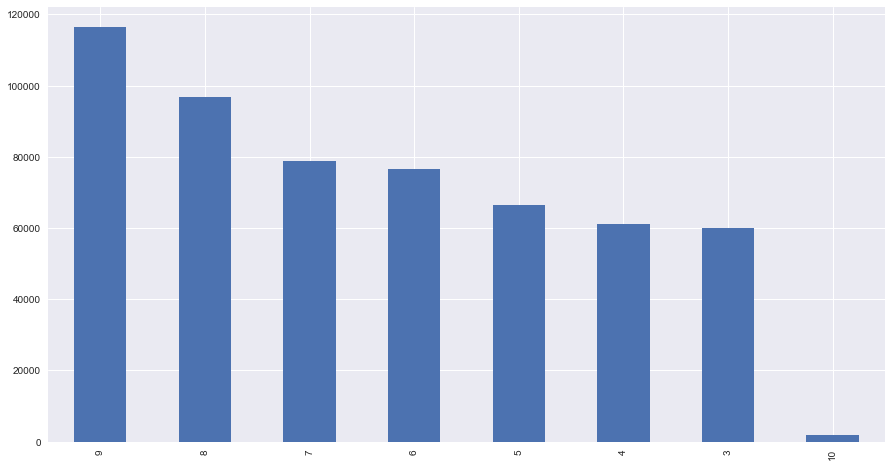

In [33]:
df['month'].value_counts().plot(kind='bar');

Как видно, больше всего покупок было сделанно в августе и сентябре. Это наводит на определенные предположения, единственное но, у нас есть статистика не за все месяцы, а для октября, скорее всего она не полная. В любом случае, построим аналогичный график по скидкам и по цене заказа, для этого разобьем эти значения на группы:

In [34]:
df['discount_percent_group'] = df['discount_percent_clear'].map(lambda x: int(x // 10) + 1 if x > 0 else 0)

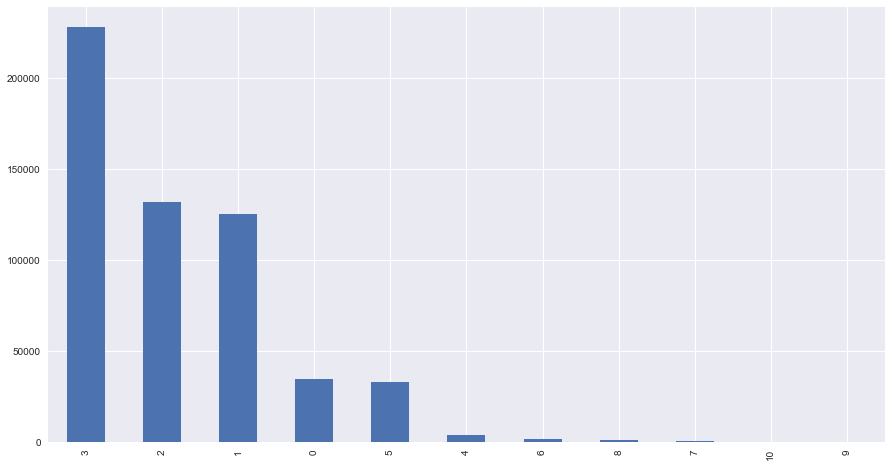

In [35]:
df['discount_percent_group'].value_counts().plot(kind='bar');

Наибольшей популярностью пользуются товары для которых скидка больше 20%. Как видно, без скидок покупать товары люди не очень любят.

In [36]:
import math

df['item_price_group'] = df['PRICE'].map(
    lambda x: int(x // 100)
)

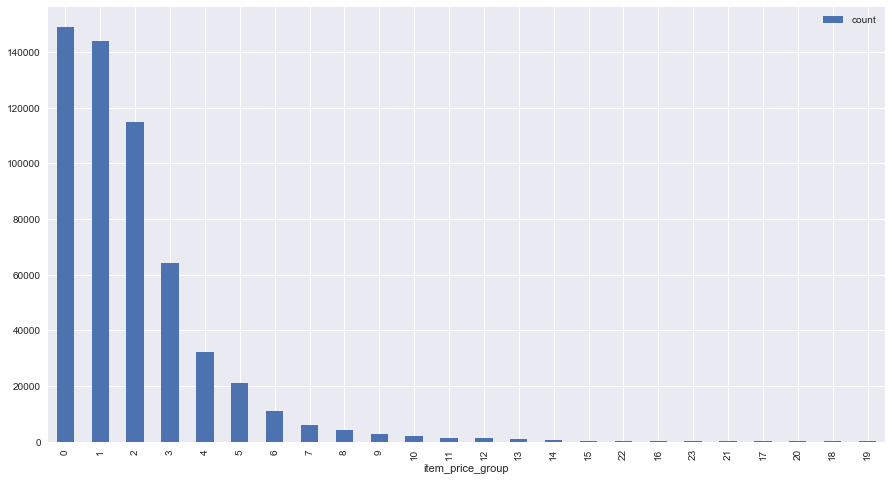

In [37]:
a = df.groupby(['item_price_group'])['item_price_group'] \
    .agg(['count']) \
    .sort_values('count', ascending=False)
a[a['count']> 100].plot(kind='bar');

Наибольшей популярностью пользуются товары в пределах от < 1000 до 2000 рублей.

In [38]:
df.groupby(['month'])['discount_percent_group'] \
    .agg(['mean']) \
    .sort_values('mean', ascending=False)

,mean
month,
9,2.42
8,2.39
7,2.35
6,2.30
10,2.12
4,2.12
5,2.03
3,2.02


Как видно, месяц особо не влияет на среднюю скидку, хотя в наиболее популярные месяцы 8 и 9 - она в среднем больше чем в остальные.

In [39]:
df['order_price_group'] = df['clear_price'].map(
    lambda x: int(x // 100)
)

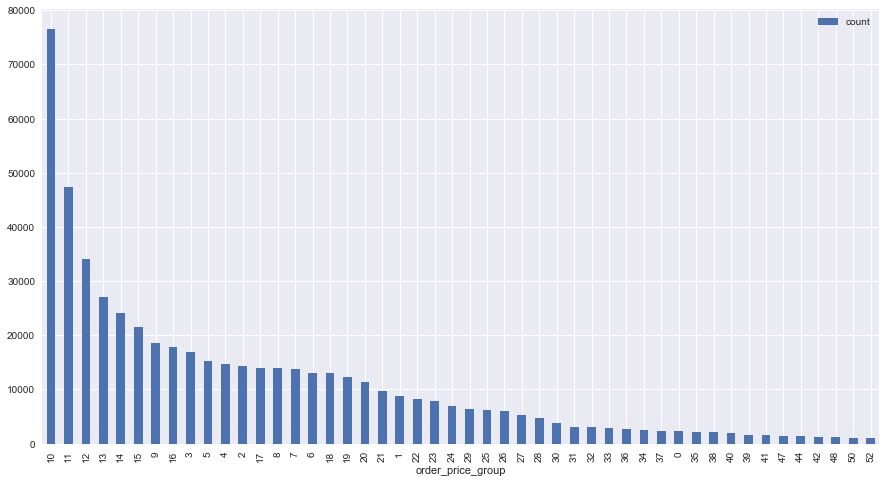

In [40]:
b = df.groupby(['order_price_group'])['order_price_group'] \
    .agg(['count']) \
    .sort_values('count', ascending=False)

b[b['count'] > 1000].plot(kind='bar');

Удивительно, но с большим отрывом лидируем средний счет равный 1000. Видимо у многих людей есть психологический барьер на эту сумму.

# 2. Спланировать эксперимент 

Задача:
* сегментация товаров + сегментация пользователей (по товарам, по поведению, скидкам и пр.)

Дополнительнительные задачи (опционально, подумайте о них, могут появиться интересные идеи и находки):
* поиск товаров-заменителей и товаров, дополняющих друг друга
* поиск выбросов среди товаров
* поиск выбросов среди заказов

Эксперимент - составить план, по которому будет проделана исследовательская работа. Примерные пункты плана:
* Составить первичный список признаков, необходимых для решения задачи
* Сгенерировать список новых признаков, которые можно получить из данных
* Применить понижение размерности для визуализации данных
* Применить кластеризацию, визуализировать
* Описание кластера
* Любые другие пункты

#### Описание эксперимента:

<p>В результате проведенного анализа данных были выявлены следующие признаки влияющие на продажи: 
<ul>
<li>month - месяц покупки</li>
<li>discount_percent_group - группа размера скидки</li>
<li>item_price_group - группа цены товара со скидкой</li>
<li>order_price_group - группа цены заказа со скидкой</li>
</ul>
Т.к. данные за окрябрь скорее всего не полные, то удалим этот месяц, чтобы избежать проблем с обучением модели.</p>
<p>Для кластеризации будем использовать KMeans из sklearn.</p>

# 3. Выполнить подготовку данных для построения модели

Выполнить необходимые преобразования данных

In [41]:
df = pd.read_csv('orders.csv')

df['discount_percent_clear'] = df['DISCOUNT_VALUE'] \
    .map(lambda x: float(x.replace('%', '')) if isinstance(x, str) else 0)

df['clear_price'] = df.groupby('orderID', as_index=False)['PRICE'].transform('sum')

df['month'] = df['date_insert'].map(lambda x: int(re.sub(r'\d{4}-(\d{2})-\d{2}.*', r'\1', x)))

df['discount_percent_group'] = df['discount_percent_clear'].map(lambda x: int(x // 10) + 1 if x > 0 else 0)

df['item_price_group'] = df['PRICE'].map(
    lambda x: int(x // 100)
)

df['order_price_group'] = df['clear_price'].map(
    lambda x: int(x // 100)
)

#### Так как датасет очень большой, то чтобы с ним можно было работать сделаем семпл, и исключим октябрь из выборки как, скорее всего, неполный месяц:

In [42]:
df_sample = df.sample(n=10000)
df_sample.shape

(10000, 17)

In [55]:
df_sample = df_sample[df_sample['month'] != 10]

X = df_sample[['month', 'discount_percent_group', 'item_price_group', 'order_price_group']].as_matrix()
X.shape

(9973, 4)

In [56]:
X

array([[ 8,  2,  2, 13],
       [ 6,  2,  1,  5],
       [ 8,  2,  1,  4],
       ..., 
       [ 8,  2,  0,  1],
       [ 4,  0,  6, 22],
       [ 3,  3,  3, 15]])

#### Нормализуем значения в матрице:

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X

/Users/andrewlarin/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[ 0.83333333,  0.2       ,  0.04      ,  0.0212766 ],
       [ 0.5       ,  0.2       ,  0.02      ,  0.00818331],
       [ 0.83333333,  0.2       ,  0.02      ,  0.00654664],
       ..., 
       [ 0.83333333,  0.2       ,  0.        ,  0.00163666],
       [ 0.16666667,  0.        ,  0.12      ,  0.03600655],
       [ 0.        ,  0.3       ,  0.06      ,  0.02454992]])

# 4. Провести построение модели 

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [59]:
inertias = []
silhs = []
for n_clusters in range(2, 10):
    print(n_clusters)

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    
    print("For n_clusters =", n_clusters, "The inertia_ is :", kmeans.inertia_, "The average silhouette_score is :", silhouette_avg)
    
    inertias.append(kmeans.inertia_)
    silhs.append(silhouette_avg)

2
For n_clusters = 2 The inertia_ is : 463.909797003 The average silhouette_score is : 0.538480069507
3
For n_clusters = 3 The inertia_ is : 310.008493416 The average silhouette_score is : 0.442334660627
4
For n_clusters = 4 The inertia_ is : 256.024081122 The average silhouette_score is : 0.382850896498
5
For n_clusters = 5 The inertia_ is : 228.530592736 The average silhouette_score is : 0.343271277089
6
For n_clusters = 6 The inertia_ is : 202.084239013 The average silhouette_score is : 0.33281117986
7
For n_clusters = 7 The inertia_ is : 179.53875335 The average silhouette_score is : 0.350458812398
8
For n_clusters = 8 The inertia_ is : 160.543258366 The average silhouette_score is : 0.382529655739
9
For n_clusters = 9 The inertia_ is : 143.247827766 The average silhouette_score is : 0.37106409742


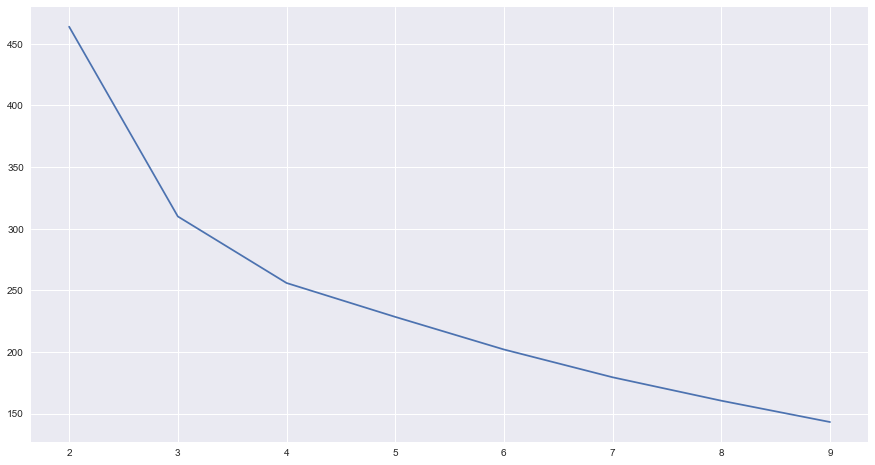

In [60]:
plt.plot(range(2, 10), inertias);

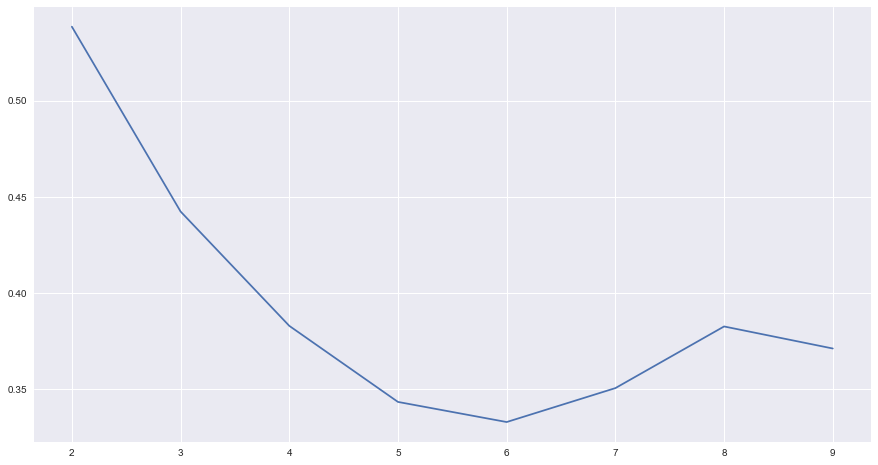

In [61]:
plt.plot(range(2, 10), silhs);

Судить по инерции и силуэту не очень просто, но субъективно, наибольший излом у графика инерции находится в районе 4, хотя наибольший силуэт находится в районе 2.

In [86]:
n_clusters = 3
kmeans = KMeans(init='k-means++', n_clusters=n_clusters)
kmeans.fit(X)
clusters = kmeans.predict(X)

In [87]:
clusters.shape

(9973,)

# 5. Проанализировать результат
получилось или нет, почему, что можно улучшить, можно ли интерпретировать результат

In [88]:
df_sample['cluster'] = clusters

In [89]:
df_sample[[
    'NAME',
    'PRICE',
    'ordered_item_count',
    'price',
    'month',
    'discount_percent_clear',
    'cluster'
]]

,NAME,PRICE,ordered_item_count,price,month,discount_percent_clear,cluster
427780,"Ветры, ангелы и люди",276.00,10,1359.00,8,16.11,0
204469,Биология. 6 класс. Диагностические работы,115.00,4,644.00,6,16.67,2
412088,Краткая история почти всего на свете,187.00,3,799.24,8,19.05,0
17697,Урфин Джюс и его деревянные солдаты,54.00,8,1126.00,3,5.56,1
92050,Летние задания по русскому языку для повторени...,79.00,5,769.00,4,3.80,1
447216,География. 7 класс. Атлас,86.00,4,464.00,8,18.10,0
323618,Каталина,33.00,6,1111.00,7,23.26,2
222285,Поди туда - не знаю куда,90.00,7,1475.00,6,18.18,2
416715,Успеть все!,227.00,37,9493.00,8,20.07,0
212073,Секреты доброй почвы для чудо-урожая,100.00,13,875.00,6,20.00,2


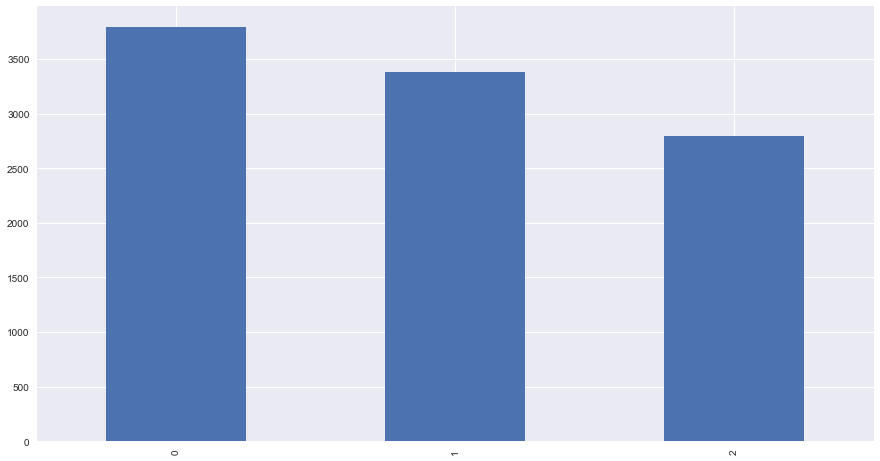

In [90]:
df_sample['cluster'].value_counts().plot(kind='bar');

<p>Как видно, результат не самый лучший, несмотря на то распределение по кластерам произошло равномерно, не очень понятно по какой логике это было сделанно. В 0 кластере, видимо лежат товары за август и сентябрь, в первом за май и апрель... получается распределение по датам.</p>
<p>Чтобы улучшить алгоритм, надо лучше понять смысл кластеризации, т.е. мы кластеризуем товары к примеру, по цене или по популярности или по категориям, но не все вместе. Поэтому надо убрать дату из матрицы и работать только, к примеру, с ценой на товар, я же захотел все и сразу в результате получилось не очень.</p>

# 6. Повторить при необходимости 

#### Раз уж не получилось нормально кластеризовать по всем категориям, то сделаем кластеризацию только по цене товара, просто посмотреть как получится и верно ли мое направление мысли:

In [96]:
df_sample['item_price_without_discount'] = df_sample.apply(
    lambda row: row['PRICE'] + (row['PRICE'] / (100 - row['discount_percent_clear']) * row['discount_percent_clear']) 
, axis=1)

In [141]:
X2 = df_sample['item_price_without_discount'].map(
    lambda x: int(x // 100)
).as_matrix().reshape(-1, 1)
X2

array([[3],
       [1],
       [2],
       ..., 
       [0],
       [6],
       [4]])

In [142]:
inertias = []
silhs = []
for n_clusters in range(2, 15):
    print(n_clusters)

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(X2)
    clusters = kmeans.predict(X2)
    silhouette_avg = silhouette_score(X2, clusters)
    
    print("For n_clusters =", n_clusters, "The inertia_ is :", kmeans.inertia_, "The average silhouette_score is :", silhouette_avg)
    
    inertias.append(kmeans.inertia_)
    silhs.append(silhouette_avg)

2
For n_clusters = 2 The inertia_ is : 38097.9674526 The average silhouette_score is : 0.69004249001
3
For n_clusters = 3 The inertia_ is : 21763.4257946 The average silhouette_score is : 0.618883992282
4
For n_clusters = 4 The inertia_ is : 13008.5499672 The average silhouette_score is : 0.653991341029
5
For n_clusters = 5 The inertia_ is : 7941.68984044 The average silhouette_score is : 0.660416573604
6
For n_clusters = 6 The inertia_ is : 5595.27556386 The average silhouette_score is : 0.68007595708
7
For n_clusters = 7 The inertia_ is : 4317.14948845 The average silhouette_score is : 0.698823737411
8
For n_clusters = 8 The inertia_ is : 3312.19966232 The average silhouette_score is : 0.861260616085
9
For n_clusters = 9 The inertia_ is : 2336.32239524 The average silhouette_score is : 0.861617379528
10
For n_clusters = 10 The inertia_ is : 1567.63243265 The average silhouette_score is : 0.912631806327
11
For n_clusters = 11 The inertia_ is : 1171.57371981 The average silhouette_scor

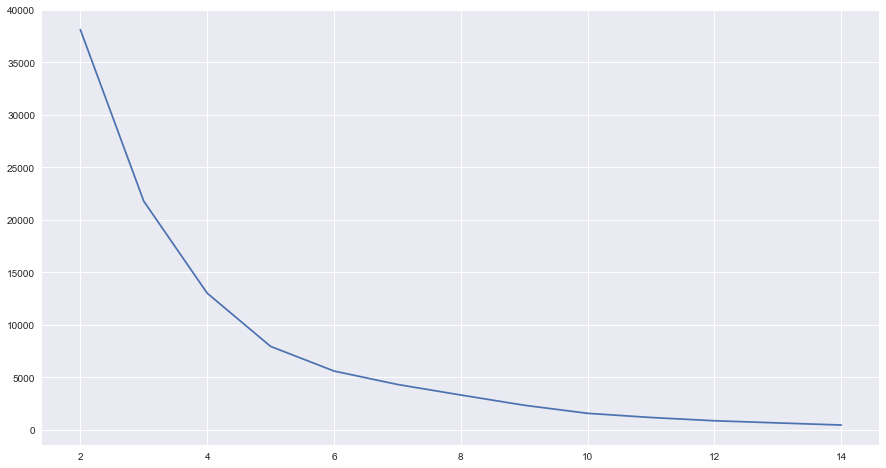

In [143]:
plt.plot(range(2, 15), inertias);

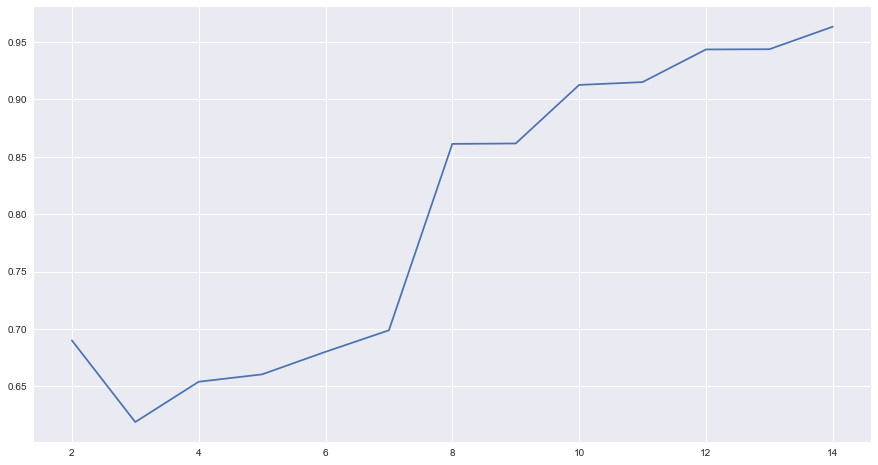

In [144]:
plt.plot(range(2, 15), silhs);

In [149]:
n_clusters = 14
kmeans = KMeans(init='k-means++', n_clusters=n_clusters)
kmeans.fit(X)
clusters = kmeans.predict(X)

In [150]:
df_sample['cluster'] = clusters

In [151]:
df_sample[[
    'NAME',
    'item_price_without_discount',
    'cluster'
]]

,NAME,item_price_without_discount,cluster
427780,"Ветры, ангелы и люди",329.00,0
204469,Биология. 6 класс. Диагностические работы,138.01,3
412088,Краткая история почти всего на свете,231.01,0
17697,Урфин Джюс и его деревянные солдаты,57.18,5
92050,Летние задания по русскому языку для повторени...,82.12,10
447216,География. 7 класс. Атлас,105.01,0
323618,Каталина,43.00,11
222285,Поди туда - не знаю куда,110.00,3
416715,Успеть все!,284.00,0
212073,Секреты доброй почвы для чудо-урожая,125.00,3


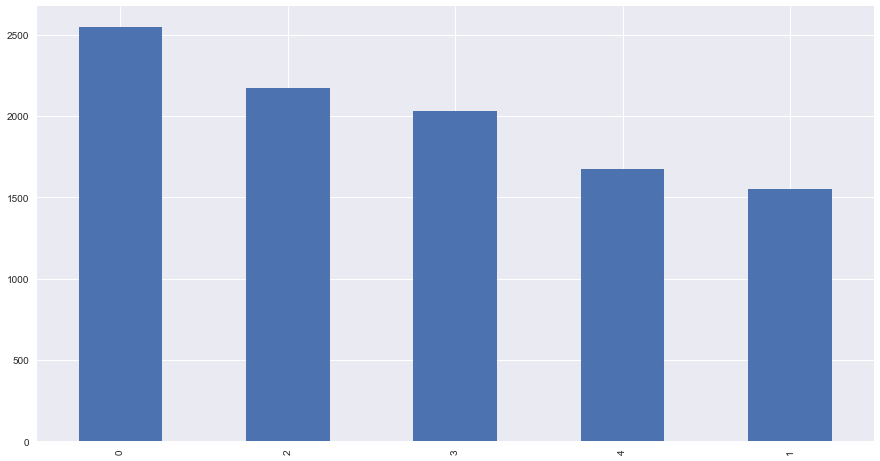

In [148]:
df_sample['cluster'].value_counts().plot(kind='bar');

Как итог, все равно получилось не очень, в один и тот же кластер попадают как дорогие так и дешевые книги, возможно стоит как-то разнести кластера дальше друг от друга в теории.

# Подсказки

* Проводить EDA и работу с признаками на всем датасете
* Для построения модели отсеивать данные тем или иным способом (обосновать выбор) - уменьшить объем данных для анализа
* Оформлять для сдачи задания все эксперименты (в том числе неудачные). Так мы сможем увидеть процесс работы над заданием
* Не тратить 90% времени на первый этап. Планировать время так, чтобы успеть поработать над моделью (в равной степени над каждым пунктом).